In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.signal import detrend
import pandas as pd

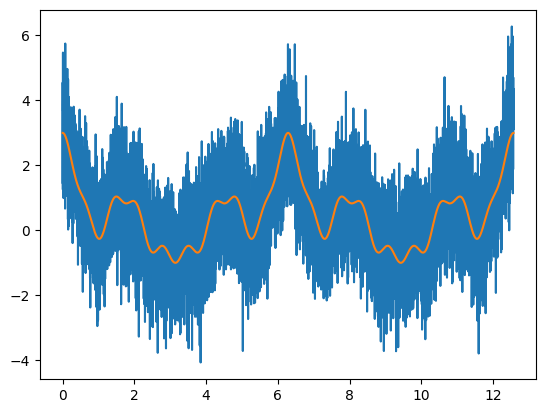

In [ ]:
N = 10001
time = np.linspace(0, 4*np.pi, N)

signal = np.zeros(N)

for j in range(1, 4):
  signal += np.cos(j*time)**j

noisysignal = signal + np.random.randn(N)

plt.plot(time, noisysignal, time, signal)
plt.show()

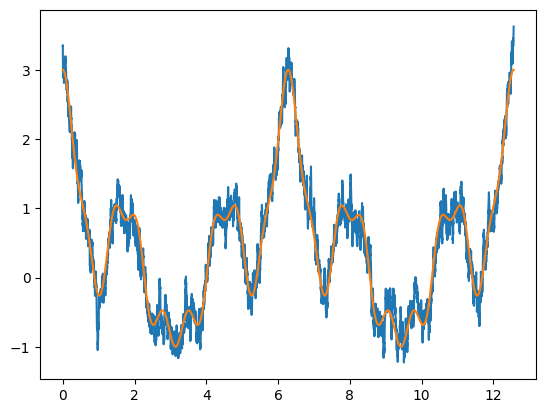

In [ ]:
# Running-Mean filter

filtsignal = copy.deepcopy(noisysignal)

k = 15

for t in range(N):
  lowbnd = np.max((0, t - k))
  uppbnd = np.min((N, t + k))
  filtsignal[t] = np.mean( noisysignal[lowbnd : uppbnd] )

plt.plot(time, filtsignal, time, signal)
plt.show()

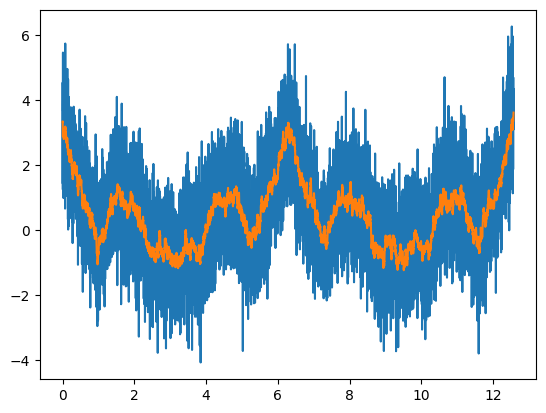

In [ ]:
plt.plot(time, noisysignal, time, filtsignal)
plt.show()

In [ ]:
def meansmooth(signalIn, k):
  filtsignal = copy.deepcopy(signalIn)
  for t in range(N):
    filtsignal[t] = np.mean( noisysignal[np.max((0, t - k)) : np.min((N, t + k))] )
  return filtsignal

kvals = np.arange(5, 41)
signalCorrs = []

for ki in kvals:
  # filter the signal
  fsig = meansmooth(noisysignal, ki)
  # compute correlation signal and original
  signalCorrs.append( np.corrcoef(fsig, signal)[0, 1] )

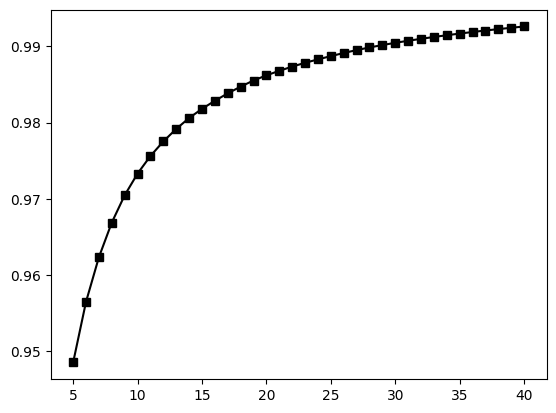

In [ ]:
plt.plot(kvals, signalCorrs, 'ks-')
plt.show()

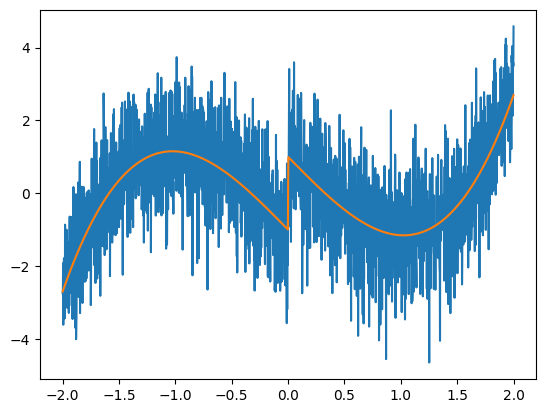

In [ ]:
# Create signal
# sampling rate
srate = 512
time = np.arange(-2, 2 + 1 / srate, 1 / srate)
pnts = len(time)

signal = detrend( time**3 + np.sign(time) )
noisysignal = signal + np.random.randn(pnts)*1.1

plt.plot(time, noisysignal, time, signal)
plt.show()

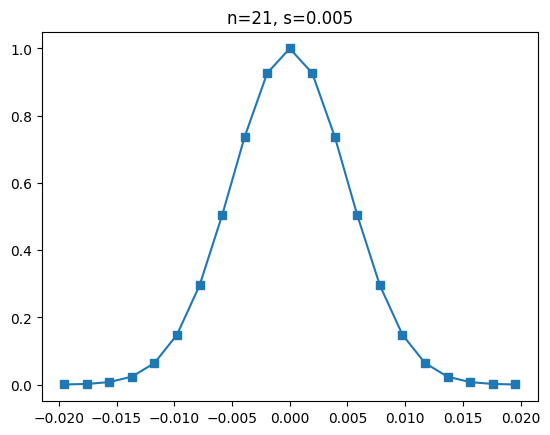

In [ ]:
# Create the guassian
k = 10
x = np.arange(-k, k + 1) / srate
s = .005

gkern = np.exp( -x**2 / (2*s**2) )

plt.plot(x, gkern, 's-');
plt.title(f'n={2*k+1}, s={s}');

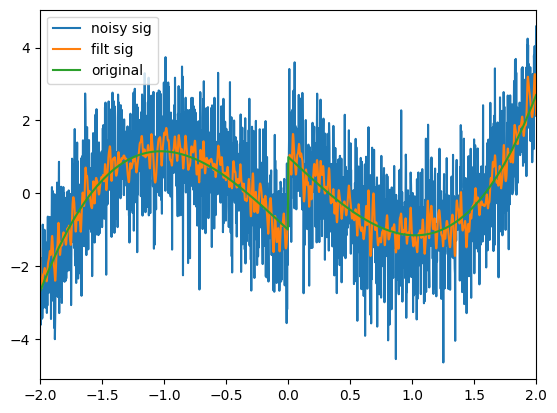

In [ ]:
gkern /= sum(gkern)
filtsig = np.convolve(noisysignal, gkern, mode='same')

plt.plot(time, noisysignal, time, filtsig, time, signal)
plt.legend(['noisy sig', 'filt sig', 'original'])
plt.xlim(time[[0, -1]])
plt.show()

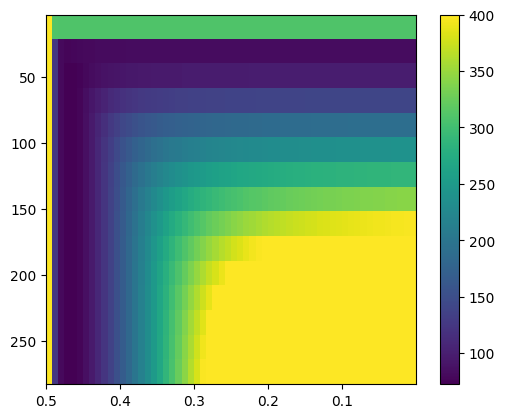

In [ ]:
# define our parameter ranges
krange = np.arange(3, 303, 20)
srange = np.linspace(.001, .5, 60)

# initialize some output variables
sseMat = np.zeros( (len(krange), len(srange)) )
allkernels = [ [0]*len(srange) for i in range(len(krange)) ]

# double loop over the two parameterss
for ki in range(len(krange)):
  for si in range(len(srange)):
    # create the gaussian
    x = np.arange(-krange[ki], krange[ki] + 1) / srate
    gkern = np.exp( -x**2 / (2*srange[si]**2) )
    # filter signal via convolution
    filtsig = np.convolve(noisysignal, gkern / sum(gkern), mode='same')
    # compute the SSE
    sseMat[ki, si] = np.sum( (filtsig-signal)**2 )

    allkernels[ki][si] = gkern

# plotting
plt.imshow(sseMat, vmax=400,
           extent=[srange[-1], srange[0], krange[-1], krange[0]])
plt.gca().set_aspect(1 / plt.gca().get_data_ratio())
plt.colorbar()
plt.show()

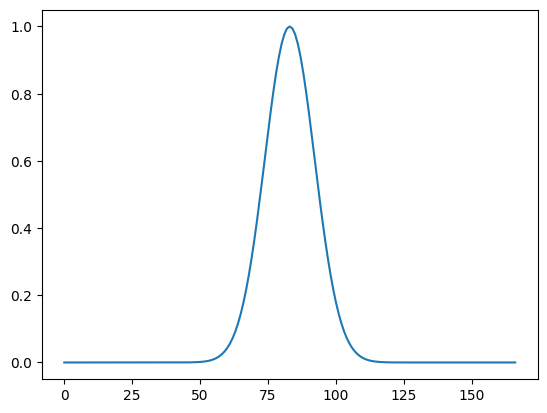

In [ ]:
plt.plot(allkernels[4][2])

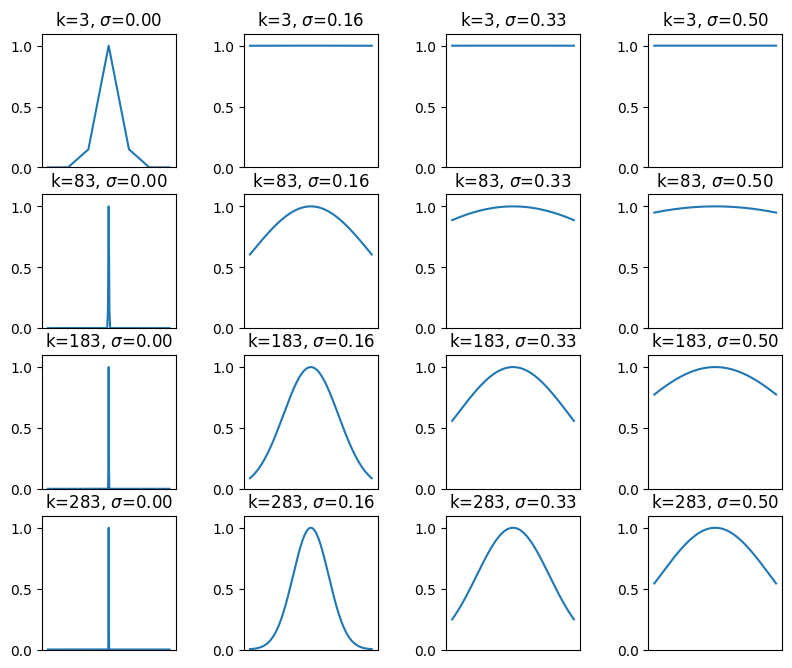

In [ ]:
# plot a few non-randomly selected Gaussian kernels

fig, ax = plt.subplots(4, 4, figsize=(10, 8))

# 4 equally spaced points on the grid
sidx = np.linspace(0, len(srange)-1, 4).astype(int)
kidx = np.linspace(0, len(krange)-1, 4).astype(int)

for si in range(4):
  for kj in range(4):
    ax[kj, si].plot(allkernels[kidx[kj]][sidx[si]])
    ax[kj, si].set_xticks([])
    ax[kj, si].set_ylim([0, 1.1])
    ax[kj, si].set_title('k=%g, $\sigma$=%.2f'%(krange[kidx[kj]], srange[sidx[si]]))
    ax[kj, si].set_aspect(1/ax[kj, si].get_data_ratio())

plt.show()

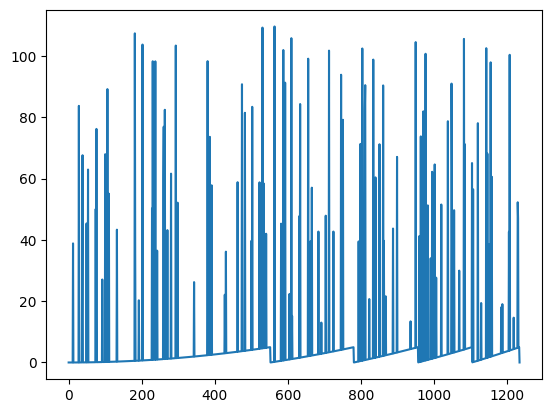

In [ ]:
pnts = 1234
signal = np.mod( np.linspace(0, 5, pnts)**2, 5 )

p = int(.1*pnts)
spiketimes = np.random.randint(0, pnts, p)

signal[spiketimes] = np.random.rand(p)*100 + 10

plt.plot(signal)
plt.show()

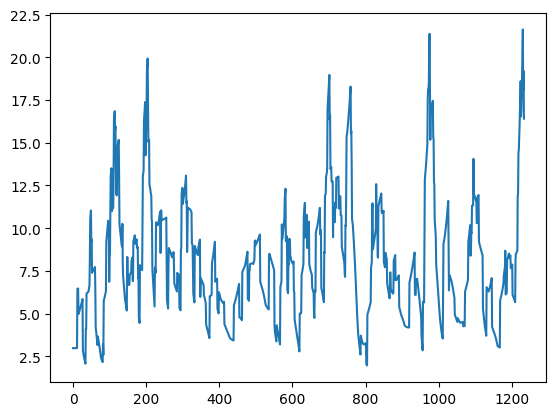

In [ ]:
# try mean-smoothing
k = 15

for i in range(pnts):
  signal[i] = np.mean( signal[np.max((0, i - k)) : np.min((pnts, i + k))] )

plt.plot(signal);

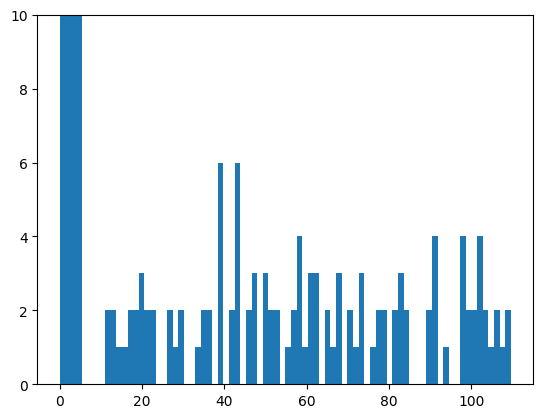

In [ ]:
# empirically define a threshold for spikes

plt.hist(signal, 80)
plt.ylim([0, 10])
plt.show()

In [ ]:
thresh = 8

# find all supra-threshold data indices

suprathresholdidx = np.where(signal > thresh)[0]

100*len(suprathresholdidx)/pnts

9.562398703403566

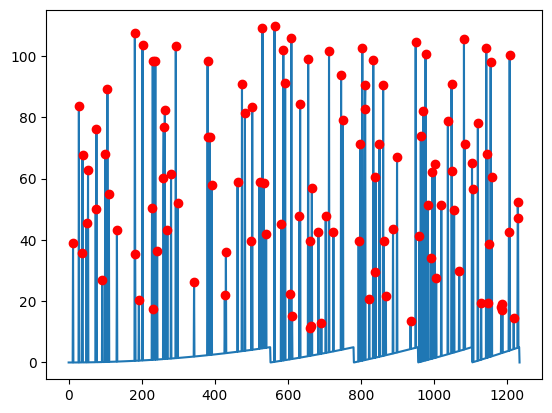

In [ ]:
plt.plot(signal)
plt.plot(suprathresholdidx, signal[suprathresholdidx], 'ro')
# plt.xlim([200, 400])
plt.show()

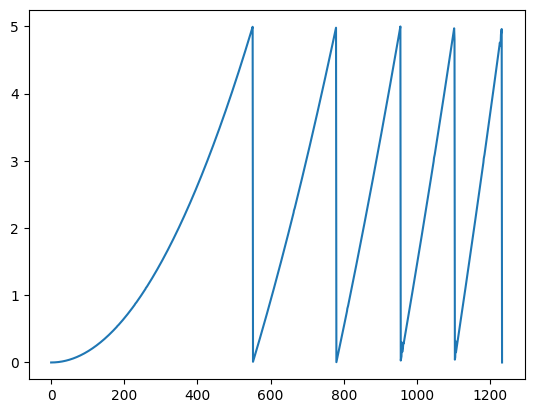

In [ ]:
k = 7

for i in suprathresholdidx:
  lowbnd = np.max((0, i - k))
  uppbnd = np.min((pnts, i + k))
  signal[i] = np.median(signal[lowbnd : uppbnd])

plt.plot(signal)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EKG_signals.csv to EKG_signals.csv


In [ ]:
df = pd.read_csv('EKG_signals.csv', sep=',', names=['noisy', 'orig'])
df

,noisy,orig
0,920.23,963
1,929.06,987
2,1116.60,1024
3,1073.60,1073
4,1070.60,1134
...,...,...
995,953.24,1020
996,913.34,1020
997,961.08,1025
998,953.80,1030


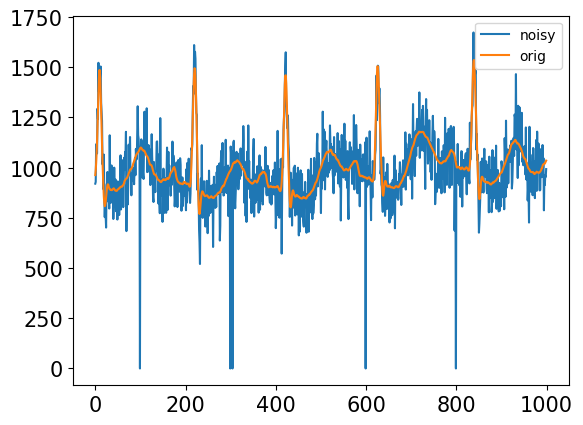

In [ ]:
df.plot(fontsize=15)
plt.show()

In [ ]:
df['filtered'] = df['noisy'].copy()
df

,noisy,orig,filtered
0,920.23,963,920.23
1,929.06,987,929.06
2,1116.60,1024,1116.60
3,1073.60,1073,1073.60
4,1070.60,1134,1070.60
...,...,...,...
995,953.24,1020,953.24
996,913.34,1020,913.34
997,961.08,1025,961.08
998,953.80,1030,953.80


In [ ]:
# median filter for small values

threshold = 321

# find subthreshold data indices
subthreshidx = np.where(df['filtered'] < threshold)[0]
subthreshidx

# apply the media filter
k = 7
for i in subthreshidx:
  lowbnd = np.max((0, i - k))
  uppbnd = np.min((len(df), i + k))
  df['filtered'][i] = np.median(df['filtered'][lowbnd:uppbnd])

<ipython-input-82-6b7c76d63f03>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered'][i] = np.median(df['filtered'][lowbnd:uppbnd])


<Axes: >

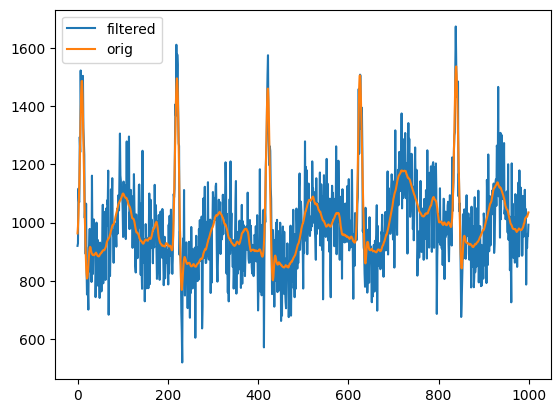

In [ ]:
df[['filtered', 'orig']].plot()

In [ ]:
# apply the mean filter
k = 7
for i in range(len(df)):
  lowbnd = np.max((0, i - k))
  uppbnd = np.min((len(df), i + k))
  df['filtered'][i] = np.mean(df['filtered'][lowbnd:uppbnd])

<ipython-input-84-fe9fbd35e532>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered'][i] = np.mean(df['filtered'][lowbnd:uppbnd])


(400.0, 450.0)

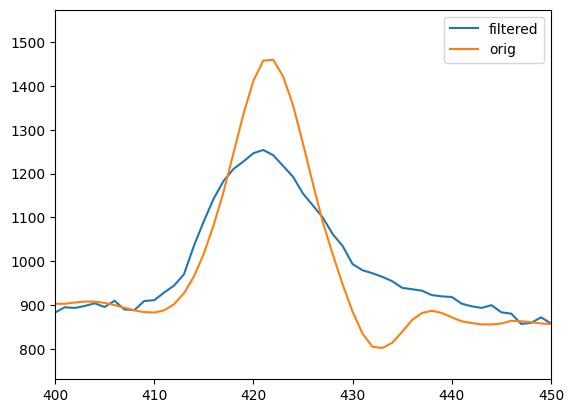

In [ ]:
df[['filtered', 'orig']].plot()
plt.xlim([400, 450])